In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [3]:
start = datetime.datetime(2007, 1, 1)
end = datetime.datetime(2017, 1, 1)

In [4]:
# Bank of America
BAC = data.DataReader("BAC", 'google', start, end)

# CitiGroup
C = data.DataReader("C", 'google', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'google', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'google', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'google', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'google', start, end)

In [5]:
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'google', start, end)

In [6]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [7]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [8]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [9]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2007-01-03   53.40  54.18  52.99  53.33  16028300  556.6  562.8  547.2  552.5   
2007-01-04   53.33  53.89  53.05  53.67  13236800  552.5  561.5  547.2  550.6   
2007-01-05   53.59  53.59  53.03  53.24  10205000  550.0  550.5  544.6  547.7   
2007-01-08   53.46  53.64  52.80  53.45   9685900  546.0  551.5  543.0  550.5   
2007-01-09   53.60  53.71  52.97  53.50  12550500  550.1  551.5  541.9  545.7   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2007-01-03   2282110    ...     81.93  82.32  80.82  81.62  4816400  35.93   
2007-01-04   1658680    ...     81.27  82.40  80.50  81.91  5038100  35.74   
2007-01-05   1317880    ...     81.35  81.59  80.36  80.86  4674400  35.79   
2007-01-08   1249520    ...     80.61  81.62  80.04  81.35  4852800  35.61   
2007-01-09   1965810    ...     81.20  81.85  80.72  81.16  5058600  35.58   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2007-01-03   36.01  35.37  35.74  12449200  
2007-01-04   36.02  35.54  35.80  11065800  
2007-01-05   35.83  35.51  35.60  10329200  
2007-01-08   35.89  35.39  35.50  11651500  
2007-01-09   35.85  35.48  35.59  10160200  

[5 rows x 30 columns]

In [12]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.05
C      552.50
GS     247.92
JPM     87.13
MS      89.30
WFC     58.52
dtype: float64

In [14]:
returns = pd.DataFrame()
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2007-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2007-01-04    0.006375 -0.003439  -0.009316    0.002496   0.003553    0.001679
2007-01-05   -0.008012 -0.005267   0.001006   -0.008300  -0.012819   -0.005587
2007-01-08    0.003944  0.005112   0.023512    0.003348   0.006060   -0.002809
2007-01-09    0.000935 -0.008719   0.001718   -0.004171  -0.002336    0.002535

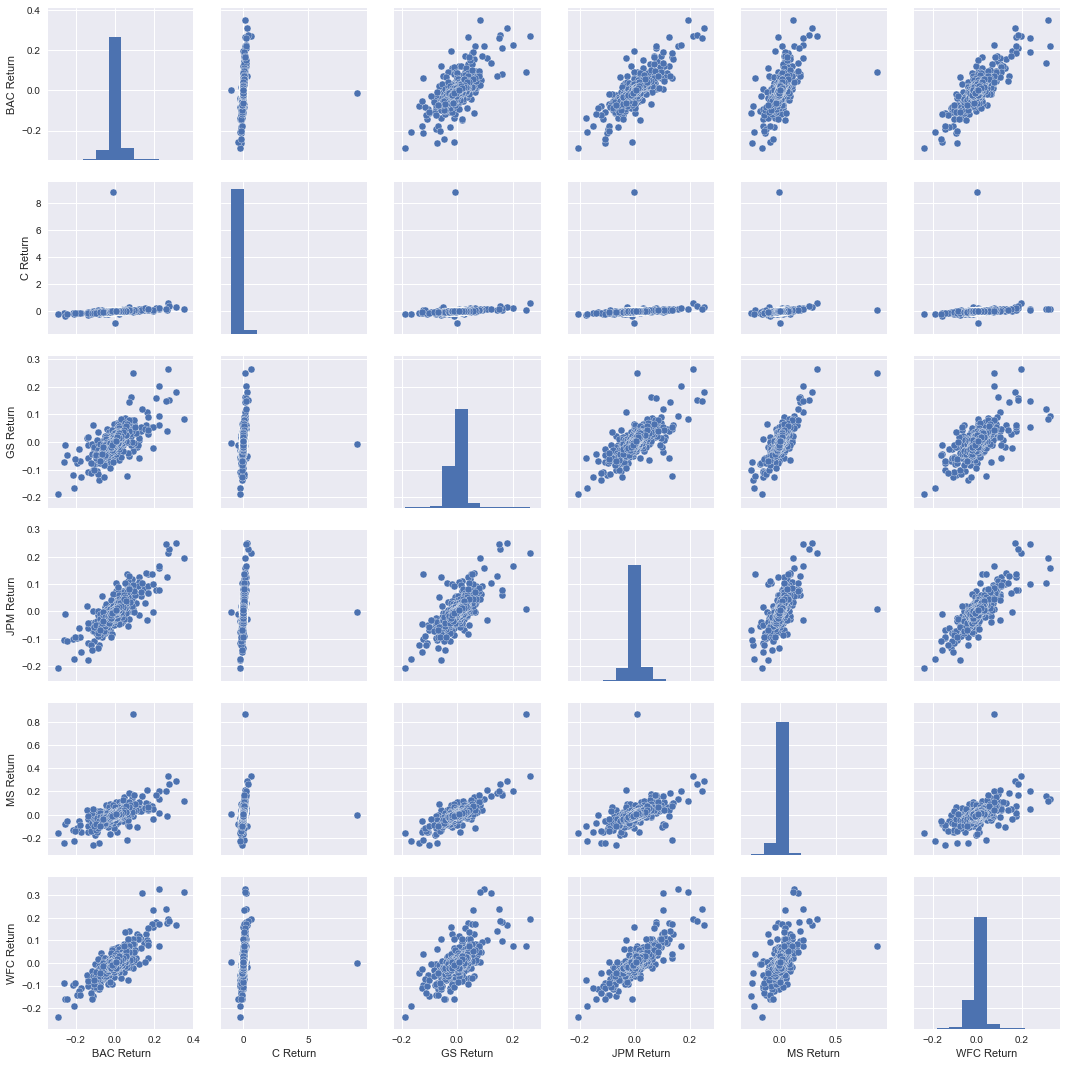

In [15]:
import seaborn as sns
sns.pairplot(returns[1:])

In [16]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [17]:
returns.std() # Citigroup riskiest

BAC Return    0.037112
C Return      0.180021
GS Return     0.025468
JPM Return    0.027884
MS Return     0.038158
WFC Return    0.030494
dtype: float64

In [18]:
returns.ix['2015-01-01':'2015-12-31'].std() # Very similar risk profiles, but Morgan Stanley or BofA

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

C:\Users\akr140230\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


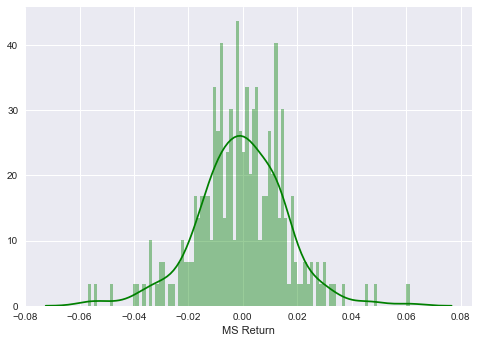

In [19]:
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

C:\Users\akr140230\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


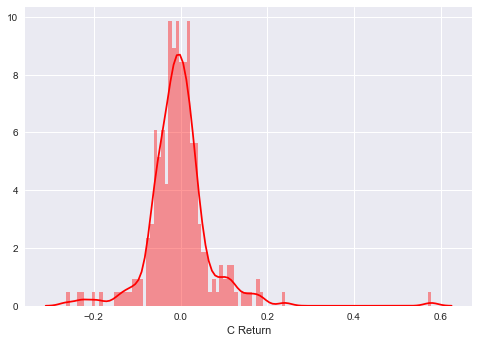

In [20]:
sns.distplot(returns.ix['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

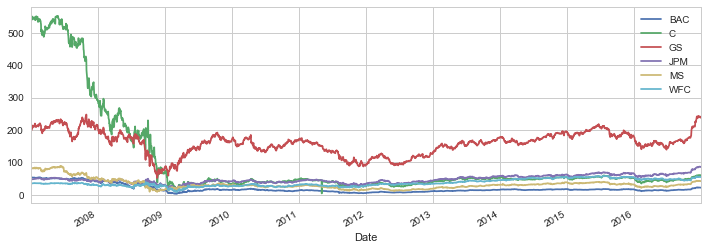

In [22]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

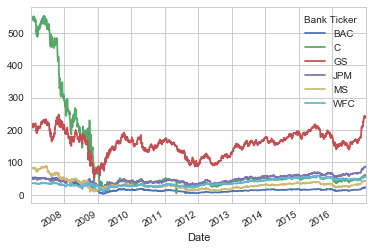

In [23]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()

In [24]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

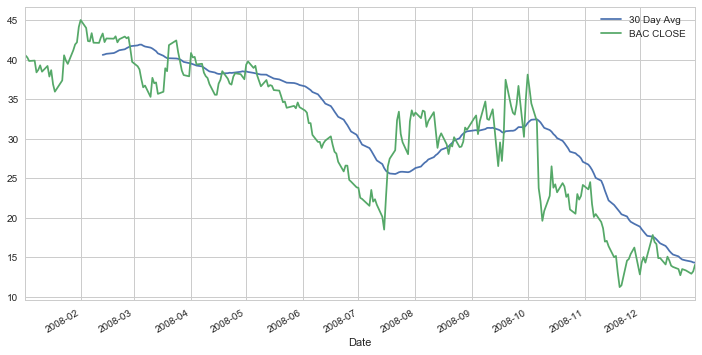

In [25]:
plt.figure(figsize=(12,6))
BAC['Close'].ix['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].ix['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

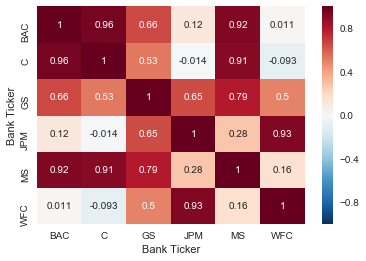

In [26]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

C:\Users\akr140230\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning:

The axisbg attribute was deprecated in version 2.0. Use facecolor instead.



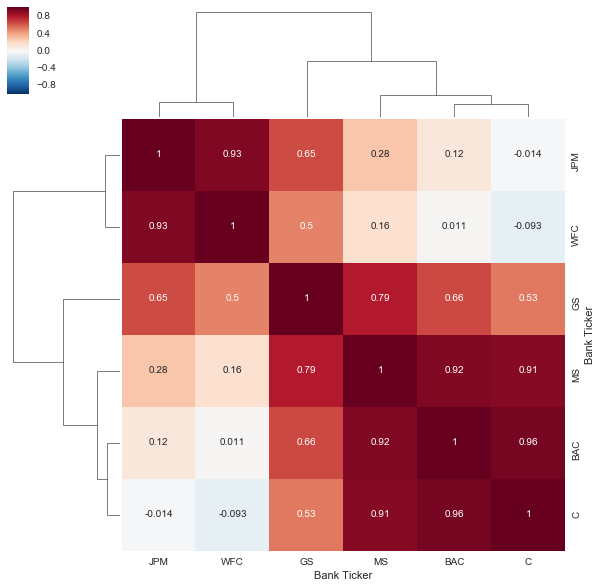

In [27]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [28]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [29]:
BAC[['Open', 'High', 'Low', 'Close']].ix['2015-01-01':'2016-01-01'].iplot(kind='candle')

C:\Users\akr140230\AppData\Local\Continuum\Anaconda3\lib\site-packages\plotly\tools.py:1417: UserWarning:

plotly.tools.FigureFactory.create_candlestick is deprecated. Use plotly.figure_factory.create_candlestick



In [30]:
MS['Close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

In [31]:
BAC['Close'].ix['2015-01-01':'2016-01-01'].ta_plot(study='boll')